인삼의 원산지 판별 모델입니다. 각기 다른 분류 모델을 통해 최고의 성능을 나타내는 분류 모델이 무엇인지 파악합니다. 

KNN 모델, 의사결정나무 모델, 로지스틱 회귀 모델, Random Forest 모델, SVM 모델, LDA 분석모델, ANN(DNN) 모델을 이용하여 각 결과를 분석, 효과적인 원산지 판별을 위한 모델이 무엇인지 판별합니다. 

이 Notebook에서는, 정규화된 데이터를 이용하였고, 상관관계와 상관없이 모든 변수를 학습에 사용시켜서 과대적합(overfitted) 모델임을 확인할 수 있습니다. 따라서 다음 Notebook에서는 상관관계 분석을 통해 의미 있는 변수들로 또 다른 모델을 사용할 예정입니다. 

In [26]:
from google.colab import drive
drive.mount('/content/gdrive') #Google Drive로 경로 지정

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate #교차검증 K-Fold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score #정확도, 재현율, 정밀도
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [27]:
total=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset/인삼 국가별 무기성분 분석표(1차)_normalized.csv')
result=pd.DataFrame.to_numpy(total)
df_result=pd.DataFrame(result)
target=df_result[0]
data=df_result.iloc[:,1:]

x_train, x_test, y_train, y_test=train_test_split(data, target, test_size=0.2, shuffle=True) #random_state=n
print(df_result)

total2=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset/인삼 국가별 무기성분 분석표(2차)_normalized.csv')
result2=pd.DataFrame.to_numpy(total2)
df_result2=pd.DataFrame(result2)
target2=df_result2[0]
data2=df_result2.iloc[:,1:]
x_train2, x_test2, y_train2, y_test2=train_test_split(data2, target2, test_size=0.2, shuffle=True) #random_state=n

print(df_result2)

          0          1          2  ...         6         7         8
0     Korea   0.776975    0.91193  ... -0.739039 -0.186408   1.14766
1     Korea     1.9528  0.0853554  ...  0.746167 -0.184696   -1.1081
2     Korea   0.386639   0.574639  ...  -1.03403 -0.186408  0.877486
3     Korea      -1.48    -1.5002  ...  0.716554 -0.156117 -0.765017
4     Korea   0.771677   0.888014  ... -0.741317 -0.181734  0.804582
..      ...        ...        ...  ...       ...       ...       ...
93  America   0.726193   0.751522  ... -0.184376 -0.216994 -0.370386
94  America   -1.60252   -1.57159  ... -0.205189 -0.192266  0.903326
95  America   -1.57254   -1.42003  ... -0.208699 -0.188749  0.980521
96  America  -0.838561   -1.43206  ...  -0.20655 -0.196508  0.986954
97  America -0.0688341   -1.14484  ... -0.179719 -0.158871   4.01684

[98 rows x 9 columns]
         0         1         2   ...        15         16         17
0     Korea  0.760136  0.294877  ... -0.934622  -0.771668  -0.438365
1     Korea

In [28]:
#의사결정나무 분석법
print("Decision Tree")

clf=DecisionTreeClassifier(random_state=5)
clf.fit(x_train, y_train)
clf_pred=clf.predict(x_test)
clf_acc=accuracy_score(y_test, clf_pred)
clf_rec=recall_score(y_test, clf_pred, average='micro')
clf_pre=precision_score(y_test, clf_pred, average='micro')

clf2=DecisionTreeClassifier(random_state=41)
clf2.fit(x_train2, y_train2)
clf_pred2=clf2.predict(x_test2)
clf_acc2=accuracy_score(y_test2, clf_pred2)
clf_rec2=recall_score(y_test2, clf_pred2, average='micro')
clf_pre2=precision_score(y_test2, clf_pred2, average='micro')

clf_kscore=(cross_val_score(clf, data, target, cv=5))
clf_kscore2=(cross_val_score(clf2, data, target, cv=5))

print("1차 데이터 예측 정확도: %.4f, %.4f, %.4f"%(clf_acc, clf_rec, clf_pre))
print("2차 데이터 예측 정확도: %.4f, %.4f, %.4f"%(clf_acc2, clf_rec2, clf_pre2))
print("K-Fold cross validation score: %.4f, %.4f"%(clf_kscore.mean(), clf_kscore2.mean()))

Decision Tree
1차 데이터 예측 정확도: 0.9000, 0.9000, 0.9000
2차 데이터 예측 정확도: 0.9500, 0.9500, 0.9500
K-Fold cross validation score: 0.8489, 0.8695


In [29]:
#KNN 분석법
print("K-Nearest-Neighbors")

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn2=KNeighborsClassifier(n_neighbors=5)
knn2.fit(x_train2, y_train2)

y_knn_pred=knn.predict(x_test)
knn_acc=accuracy_score(y_test, y_knn_pred)
knn_rec=recall_score(y_test, y_knn_pred, average='micro')
knn_pre=precision_score(y_test, y_knn_pred, average='micro')

y_knn_pred2=knn2.predict(x_test2)
knn_acc2=accuracy_score(y_test2, y_knn_pred2)
knn_rec2=recall_score(y_test, y_knn_pred2, average='micro')
knn_pre2=precision_score(y_test, y_knn_pred2, average='micro')

print("1차 데이터 예측 정확도: %.4f, %.4f, %.4f"%(knn_acc, knn_rec, knn_pre))
print("2차 데이터 예측 정확도: %.4f, %.4f, %.4f"%(knn_acc2, knn_rec2, knn_pre2))

knn_kscore=(cross_val_score(knn, data, target, cv=5))
knn_kscore2=(cross_val_score(knn2, data, target, cv=5))
print("K-Fold cross validation score: %.4f, %.4f"%(knn_kscore.mean(), knn_kscore2.mean()))

K-Nearest-Neighbors
1차 데이터 예측 정확도: 0.5500, 0.5500, 0.5500
2차 데이터 예측 정확도: 0.6500, 0.3000, 0.3000
K-Fold cross validation score: 0.6453, 0.6453


In [30]:
#Linear Discriminant Analysis
print("Linear Discriminant Analysis")

lda=LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
lda_pred=lda.predict(x_test)
lda_acc=accuracy_score(y_test, lda_pred)
lda_rec=recall_score(y_test, lda_pred, average='micro')
lda_pre=precision_score(y_test, lda_pred, average='micro')

lda2=LinearDiscriminantAnalysis()
lda2.fit(x_train2, y_train2)
lda2_pred=lda2.predict(x_test2)
lda_acc2=accuracy_score(y_test2, lda2_pred)
lda_rec2=recall_score(y_test, lda2_pred, average='micro')
lda_pre2=precision_score(y_test, lda2_pred, average='micro')

print("1차 데이터 예측 정확도: %.4f, %.4f, %.4f"%(lda_acc, lda_rec, lda_pre))
print("2차 데이터 예측 정확도: %.4f, %.4f, %.4f"%(lda_acc2, lda_rec2, lda_pre2))

lda_kscore=(cross_val_score(lda, data, target, cv=5))
lda_kscore2=(cross_val_score(lda2, data, target, cv=5))
print("K-Fold cross validation score: %.4f, %.4f"%(lda_kscore.mean(), lda_kscore2.mean()))

Linear Discriminant Analysis
1차 데이터 예측 정확도: 0.3000, 0.3000, 0.3000
2차 데이터 예측 정확도: 0.2500, 0.4500, 0.4500
K-Fold cross validation score: 0.2247, 0.2247


In [31]:
#Support Vector Machine
print("Support Vector Machine")

svc=SVC(kernel='rbf')
svc.fit(x_train, y_train)

svc2=SVC(kernel='rbf')
svc2.fit(x_train2, y_train2)

y_svc_pred=svc.predict(x_test)
svc_acc=accuracy_score(y_test, y_svc_pred)
svc_rec=recall_score(y_test, y_svc_pred, average='micro')
svc_pre=precision_score(y_test, y_svc_pred, average='micro')

y_svc_pred2=svc2.predict(x_test2)
svc_acc2=accuracy_score(y_test2, y_svc_pred2)
svc_rec2=recall_score(y_test, y_svc_pred2, average='micro')
svc_pre2=precision_score(y_test, y_svc_pred2, average='micro')

print("1차 데이터 예측 정확도: %.4f, %.4f, %.4f"%(svc_acc, svc_rec, svc_pre))
print("2차 데이터 예측 정확도: %.4f, %.4f, %.4f"%(svc_acc2, svc_rec2, svc_pre2))

svc_kscore=(cross_val_score(svc, data, target, cv=5))
svc_kscore2=(cross_val_score(svc2, data, target, cv=5))
print("K-Fold cross validation score: %.4f, %.4f"%(svc_kscore.mean(), svc_kscore2.mean()))

Support Vector Machine
1차 데이터 예측 정확도: 0.7000, 0.7000, 0.7000
2차 데이터 예측 정확도: 0.4500, 0.4000, 0.4000
K-Fold cross validation score: 0.5942, 0.5942


In [32]:
#Logistic Regression
print("Logistic Regression")

lrc=LogisticRegression()
lrc.fit(x_train, y_train)

lrc2=LogisticRegression()
lrc2.fit(x_train2, y_train2)

y_lrc_pred=lrc.predict(x_test)
lrc_acc=accuracy_score(y_test, y_lrc_pred) 
lrc_rec=recall_score(y_test, y_lrc_pred, average='micro')
lrc_pre=precision_score(y_test, y_lrc_pred, average='micro')

y_lrc_pred2=lrc2.predict(x_test2)
lrc_acc2=accuracy_score(y_test2, y_lrc_pred2)
lrc_rec2=recall_score(y_test, y_lrc_pred2, average='micro')
lrc_pre2=precision_score(y_test, y_lrc_pred2, average='micro')

print("1차 데이터 예측 정확도: %.4f, %.4f, %.4f"%(lrc_acc, lrc_rec, lrc_pre))
print("2차 데이터 예측 정확도: %.4f, %.4f, %.4f"%(lrc_acc2, lrc_rec2, lrc_pre2))

lrc_kscore=(cross_val_score(lrc, data, target, cv=5))
lrc_kscore2=(cross_val_score(lrc2, data, target, cv=5))
print("K-Fold cross validation score: %.4f, %.4f"%(lrc_kscore.mean(), lrc_kscore2.mean()))

Logistic Regression
1차 데이터 예측 정확도: 0.3500, 0.3500, 0.3500
2차 데이터 예측 정확도: 0.2500, 0.4500, 0.4500
K-Fold cross validation score: 0.2253, 0.2253


In [33]:
#Random Forest 모델
print("Random Forest")

forest=RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train)

y_for_pred=forest.predict(x_test)
for_acc=accuracy_score(y_test, y_for_pred) 
for_rec=recall_score(y_test, y_for_pred, average='micro')
for_pre=precision_score(y_test, y_for_pred, average='micro')

forest2=RandomForestClassifier(n_estimators=100)
forest2.fit(x_train2, y_train2)

y_for_pred2=forest2.predict(x_test2)
for_acc2=accuracy_score(y_test2, y_for_pred2) 
for_rec2=recall_score(y_test2, y_for_pred2, average='micro')
for_pre2=precision_score(y_test2, y_for_pred2, average='micro')

print("1차 데이터 예측 정확도: %.4f, %.4f, %.4f"%(for_acc, for_rec, for_pre))
print("2차 데이터 예측 정확도: %.4f, %.4f, %.4f"%(for_acc2, for_rec2, for_pre2))

for_kscore=(cross_val_score(forest, data, target, cv=5))
for_kscore2=(cross_val_score(forest2, data, target, cv=5))
print("K-Fold cross validation score: %.4f, %.4f"%(for_kscore.mean(), for_kscore2.mean()))

Random Forest
1차 데이터 예측 정확도: 0.9000, 0.9000, 0.9000
2차 데이터 예측 정확도: 0.9000, 0.9000, 0.9000
K-Fold cross validation score: 0.8474, 0.8895


Deep Learning Model
Epoch 1/50
78/78 [==============================] - 1s 4ms/step - loss: 0.9613 - accuracy: 0.4872 - val_loss: 2.5685 - val_accuracy: 0.0000e+00
Epoch 2/50
78/78 [==============================] - 0s 2ms/step - loss: 0.7606 - accuracy: 0.7179 - val_loss: 2.9155 - val_accuracy: 0.0000e+00
Epoch 3/50
78/78 [==============================] - 0s 5ms/step - loss: 0.6612 - accuracy: 0.7821 - val_loss: 3.0493 - val_accuracy: 0.0000e+00
Epoch 4/50
78/78 [==============================] - 0s 2ms/step - loss: 0.5594 - accuracy: 0.7949 - val_loss: 3.3270 - val_accuracy: 0.0000e+00
Epoch 5/50
78/78 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.8077 - val_loss: 3.3343 - val_accuracy: 0.0000e+00
Epoch 6/50
78/78 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8590 - val_loss: 3.5534 - val_accuracy: 0.0000e+00
Epoch 7/50
78/78 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8718 - val_loss: 3.7547

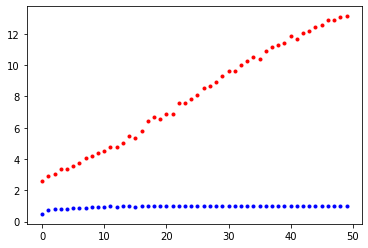

Epoch 1/50
78/78 [==============================] - 1s 5ms/step - loss: 0.9798 - accuracy: 0.4615 - val_loss: 2.5813 - val_accuracy: 0.0000e+00
Epoch 2/50
78/78 [==============================] - 0s 2ms/step - loss: 0.7866 - accuracy: 0.6282 - val_loss: 2.9874 - val_accuracy: 0.0000e+00
Epoch 3/50
78/78 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.7564 - val_loss: 3.4739 - val_accuracy: 0.0000e+00
Epoch 4/50
78/78 [==============================] - 0s 2ms/step - loss: 0.5657 - accuracy: 0.8590 - val_loss: 3.8646 - val_accuracy: 0.0000e+00
Epoch 5/50
78/78 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.8590 - val_loss: 4.1047 - val_accuracy: 0.0000e+00
Epoch 6/50
78/78 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.8974 - val_loss: 4.3097 - val_accuracy: 0.0500
Epoch 7/50
78/78 [==============================] - 0s 2ms/step - loss: 0.3044 - accuracy: 0.9615 - val_loss: 4.6982 - val_accuracy: 0.0500


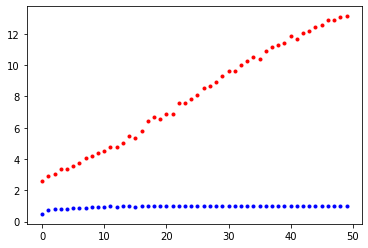

In [34]:
#Deep Learning Model
print("Deep Learning Model")

le=LabelEncoder() #원-핫 인코딩
le.fit(target)
encoded=le.transform(target)
e_target=np_utils.to_categorical(encoded)
f_data=data.astype(float)

le2=LabelEncoder()
le2.fit(target2)
encoded2=le.transform(target2)
e_target2=np_utils.to_categorical(encoded2)
f_data2=data2.astype(float)

seq=Sequential()
seq.add(Dense(100, input_dim=8, activation='relu'))
seq.add(Dense(50, activation='relu'))
seq.add(Dense(3, activation='softmax'))
seq.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#seq.fit(f_data, e_target, validation_split=0.2, epochs=50, batch_size=1, verbose=2)
seq_dir='./seq/'
if not os.path.exists(seq_dir):
    os.mkdir(seq_dir)
seqpath="./seq/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer=ModelCheckpoint(filepath=seqpath, monitor='val_loss', verbose=1, save_best_only=True)

history=seq.fit(f_data, e_target, validation_split=0.2, epochs=50, batch_size=1)
y_vloss=history.history['val_loss']
y_acc=history.history['accuracy']
x_len=np.arange(len(y_acc))

plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c='blue', markersize=3)
plt.show()

seq2=Sequential()
seq2.add(Dense(100, input_dim=17, activation='relu'))
seq2.add(Dense(50, activation='relu'))
seq2.add(Dense(3, activation='softmax'))
seq2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#seq2.fit(f_data2, e_target2, validation_split=0.2, epochs=50, batch_size=1)
seq2_dir='./seq2/'
if not os.path.exists(seq2_dir):
    os.mkdir(seq2_dir)
seq2path="./seq2/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer2=ModelCheckpoint(filepath=seq2path, monitor='val_loss', verbose=1, save_best_only=True)

history2=seq2.fit(f_data2, e_target2, validation_split=0.2, epochs=50, batch_size=1)
y_vloss2=history.history['val_loss']
y_acc2=history.history['accuracy']
x_len2=np.arange(len(y_acc2))

plt.plot(x_len2, y_vloss2, "o", c="red", markersize=3)
plt.plot(x_len2, y_acc2, "o", c='blue', markersize=3)
plt.show()